In [ ]:
!wget https://raw.githubusercontent.com/mihikasanghvi/Grp1_AML-Project/main/Dry_Eye_Dataset.csv
!wget https://raw.githubusercontent.com/mihikasanghvi/Grp1_AML-Project/main/Cleaned_Dry_Eye_Dataset.csv

--2025-03-25 19:32:47--  https://raw.githubusercontent.com/mihikasanghvi/Grp1_AML-Project/main/Dry_Eye_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1408344 (1.3M) [text/plain]
Saving to: ‘Dry_Eye_Dataset.csv’

Dry_Eye_Dataset.csv 100%[===================>]   1.34M  --.-KB/s    in 0.07s   

2025-03-25 19:32:47 (20.4 MB/s) - ‘Dry_Eye_Dataset.csv’ saved [1408344/1408344]

--2025-03-25 19:32:47--  https://raw.githubusercontent.com/mihikasanghvi/Grp1_AML-Project/main/Cleaned_Dry_Eye_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Dry_Eye_Dataset.csv")

df[['Systolic BP', 'Diastolic BP']] = df['Blood pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood pressure'], inplace=True)

print(df.head(3))

  Gender  Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0      F   24             9.5              2             1          67   
1      M   39             9.6              2             3          60   
2      F   45             5.4              1             5          95   

   Daily steps  Physical activity  Height  Weight  ... Ongoing medication  \
0         3000                 31     161      69  ...                  Y   
1        12000                 74     164      87  ...                  Y   
2        12000                 93     179      94  ...                  N   

  Smart device before bed Average screen time Blue-light filter  \
0                       N                 8.7                 N   
1                       N                 9.6                 Y   
2                       Y                 4.0                 N   

  Discomfort Eye-strain Redness in eye Itchiness/Irritation in eye  \
0                     Y              Y                 

In [ ]:
class_distribution = df["Dry Eye Disease"].value_counts()
print(class_distribution)

Dry Eye Disease
Y    13037
N     6963
Name: count, dtype: int64


In [ ]:
# These are our categorical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(numerical_features)

# Dry Eye disease is our target
categorical_features.remove("Dry Eye Disease")

['Gender', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']
['Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time', 'Systolic BP', 'Diastolic BP']


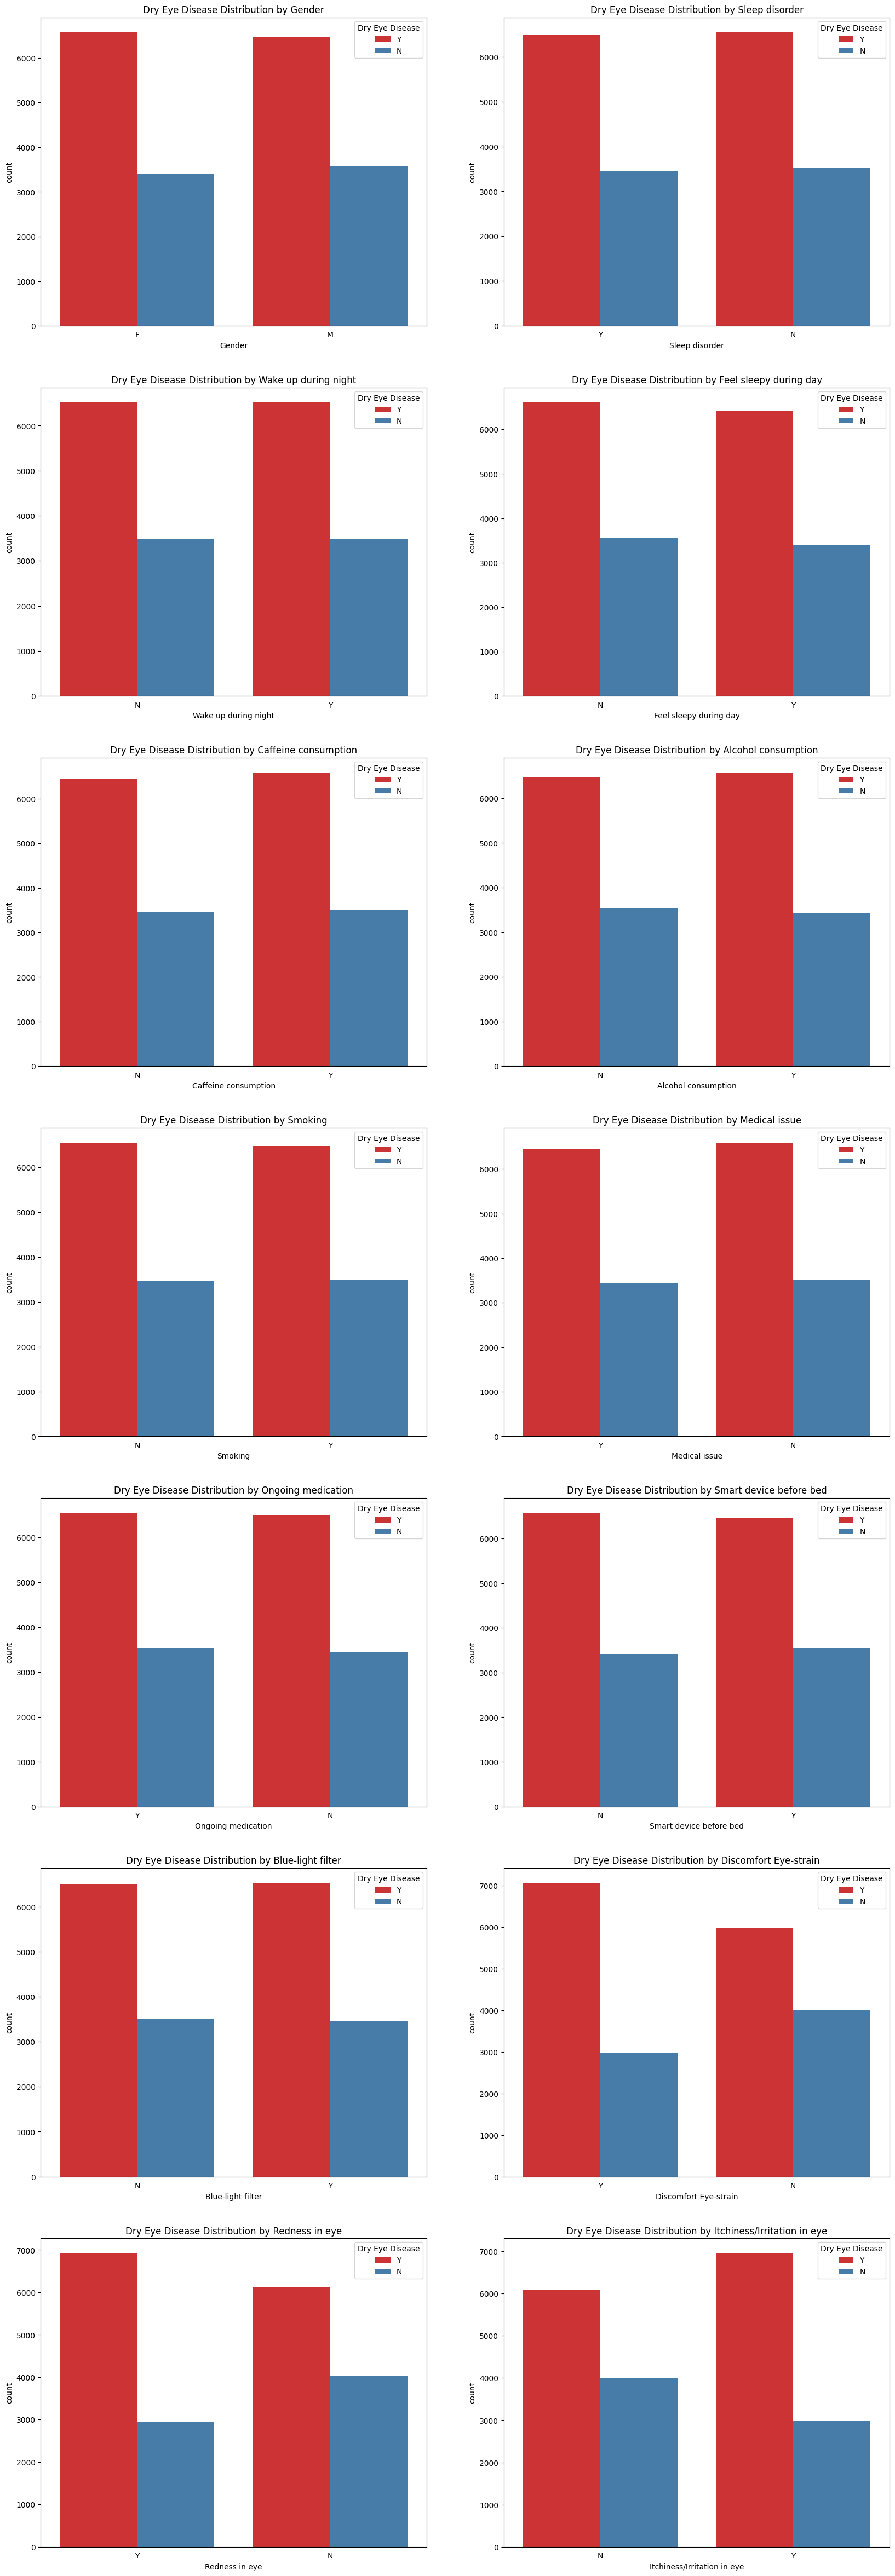

In [ ]:
fig, axes = plt.subplots(nrows=len(categorical_features)//2, ncols=2, figsize=(20, 60))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
  sns.countplot(data=df, x=col, hue="Dry Eye Disease", ax=axes[i], palette="Set1")
  axes[i].set_title(f"Dry Eye Disease Distribution by {col}")
  axes[i].tick_params(axis="x", bottom=False)

plt.show()

Age                       31.364498
Sleep duration             7.000316
Sleep quality              3.006894
Stress level               2.983197
Heart rate                79.945857
Daily steps            10492.316530
Physical activity         90.305185
Height                   174.995548
Weight                    74.842453
Average screen time        5.439681
Systolic BP              114.838575
Diastolic BP              75.061324
dtype: float64
Age                       31.453939
Sleep duration             6.997139
Sleep quality              2.992099
Stress level               2.999386
Heart rate                79.894224
Daily steps            10560.711820
Physical activity         89.944006
Height                   174.796656
Weight                    74.918233
Average screen time        5.562721
Systolic BP              115.063895
Diastolic BP              74.966173
dtype: float64


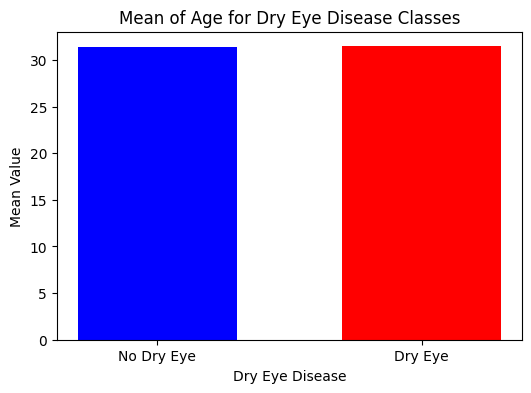

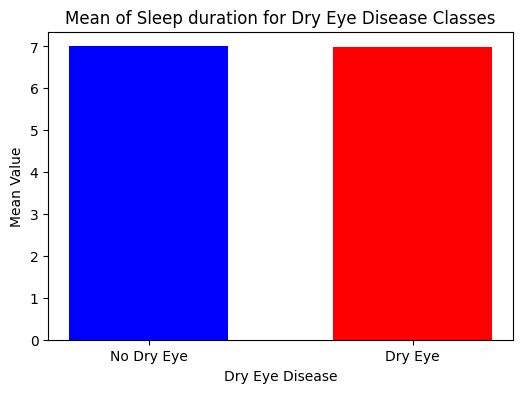

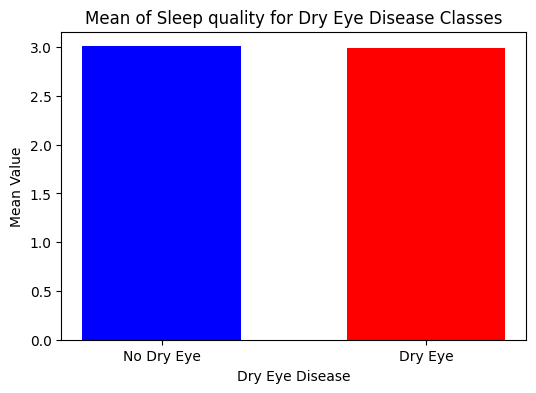

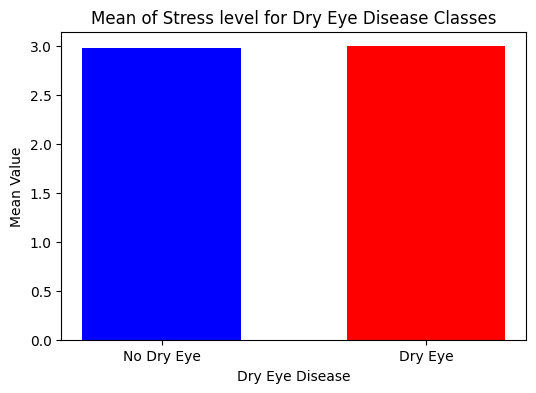

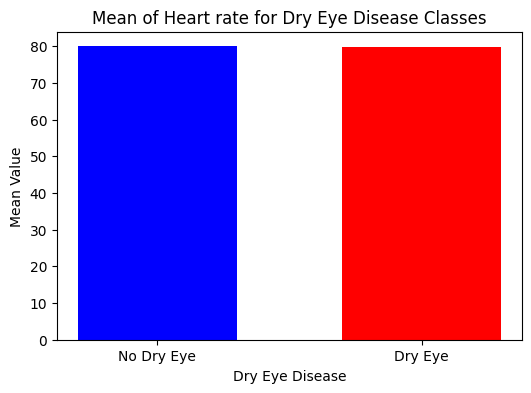

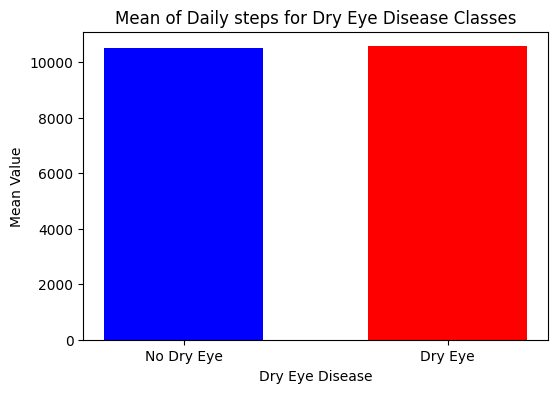

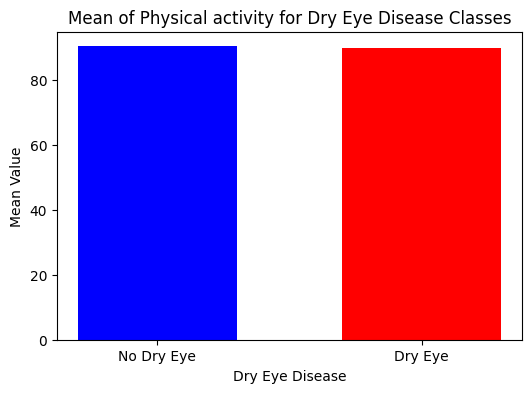

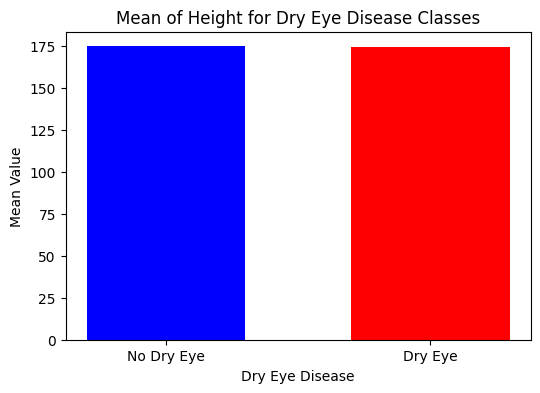

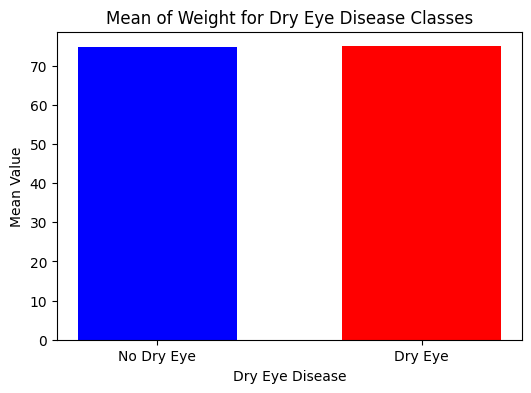

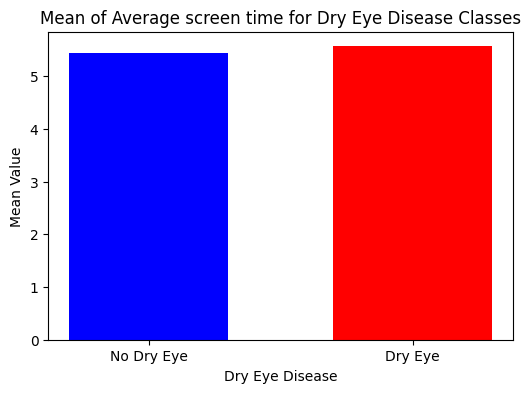

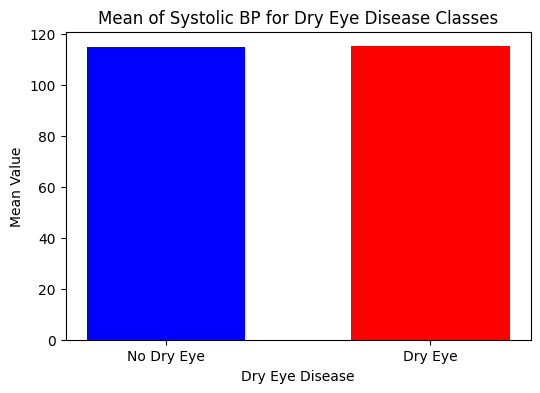

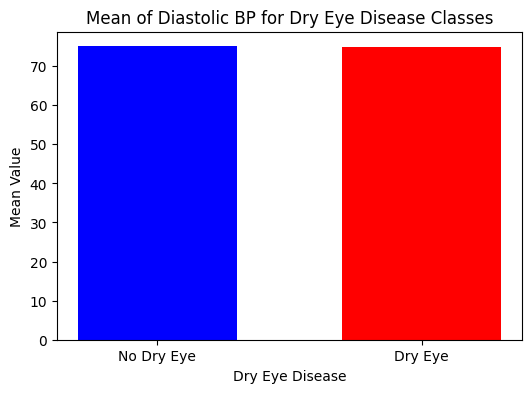

In [ ]:
target_class = 'Dry Eye Disease'

mean_values_class_n = df[df[target_class] == 'N'][numerical_features].mean()
mean_values_class_y = df[df[target_class] == 'Y'][numerical_features].mean()

print(mean_values_class_n)
print(mean_values_class_y)

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.bar(['No Dry Eye', 'Dry Eye'], [mean_values_class_n[feature], mean_values_class_y[feature]],
            color=['blue', 'red'], width=0.6)

    plt.title(f'Mean of {feature} for Dry Eye Disease Classes')
    plt.xlabel('Dry Eye Disease')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)

plt.show()


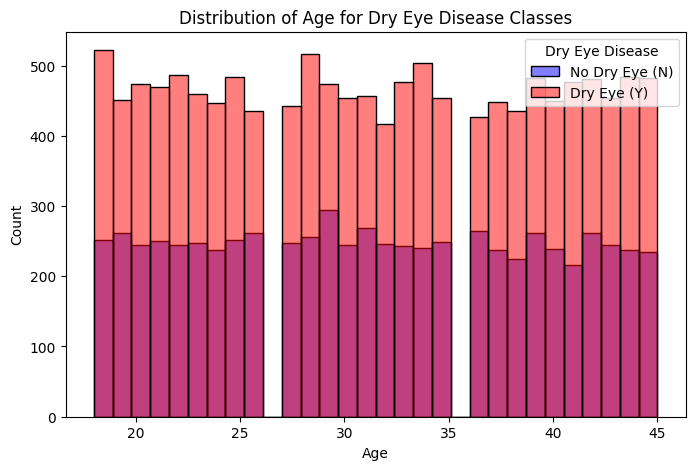

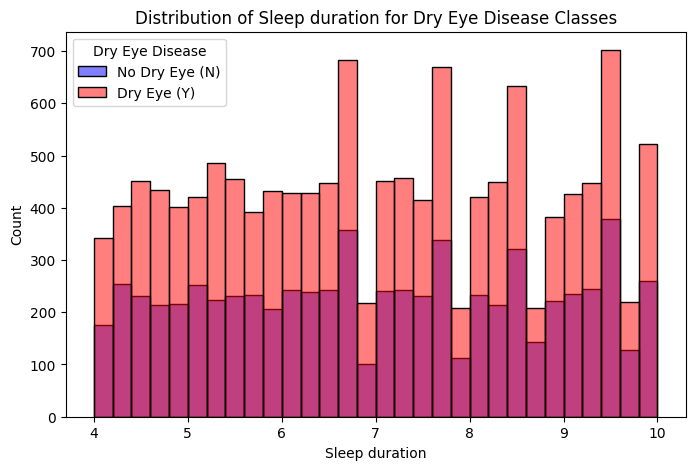

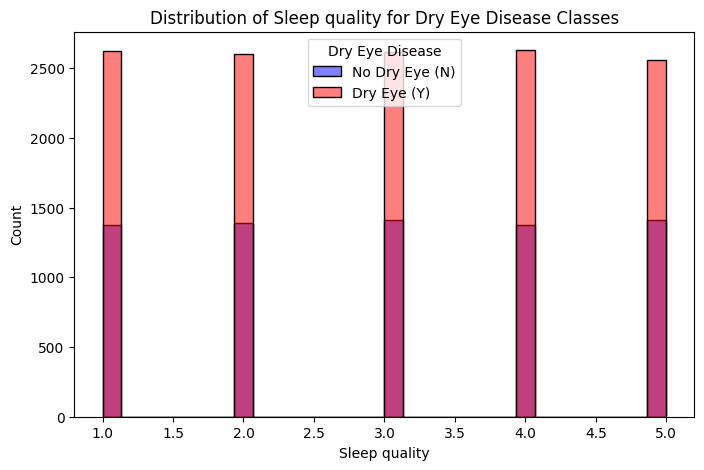

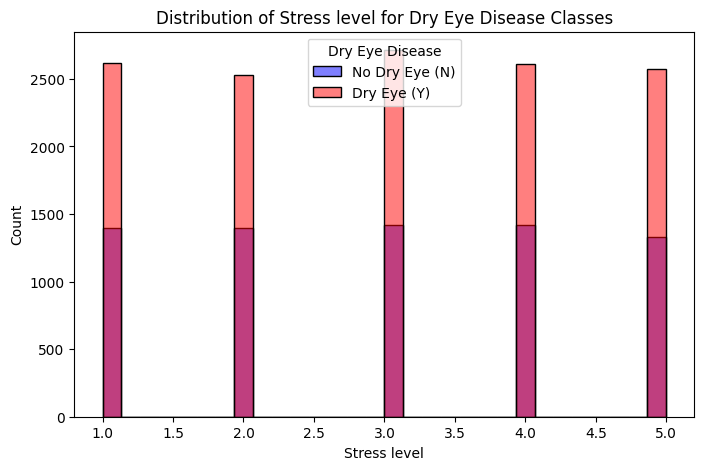

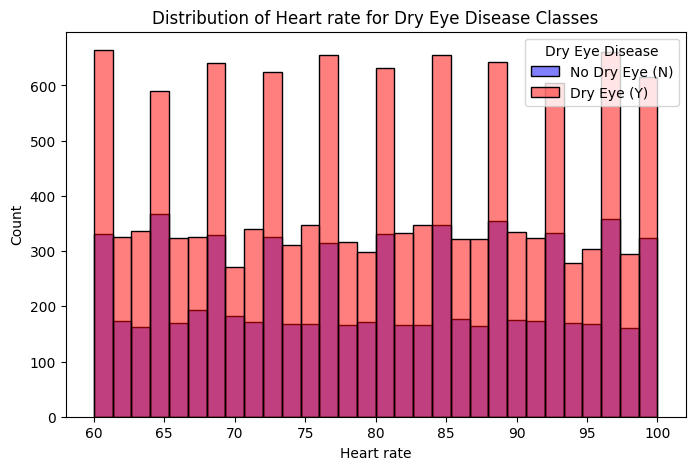

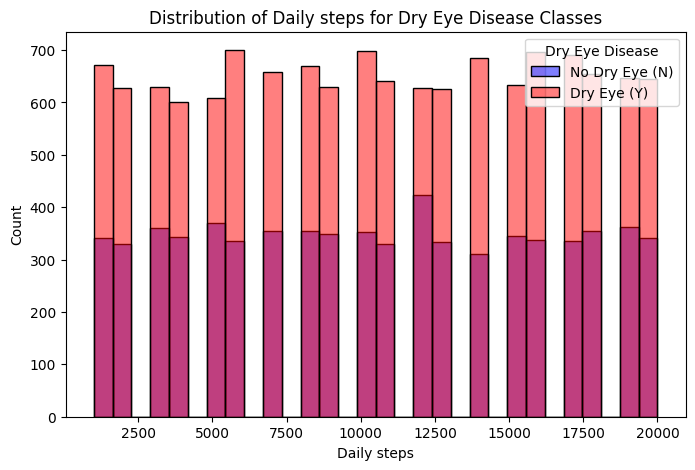

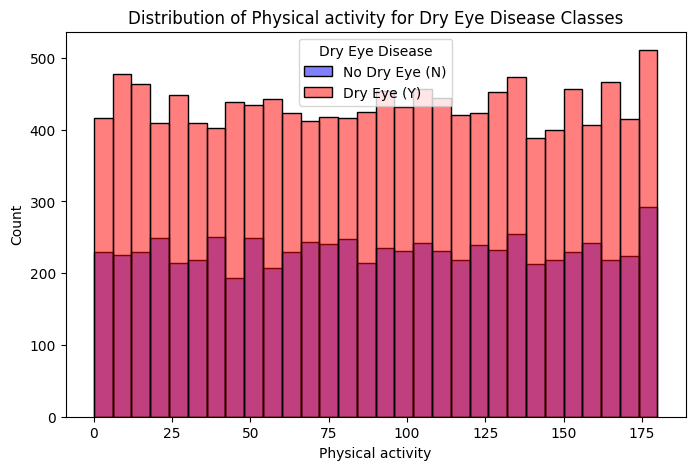

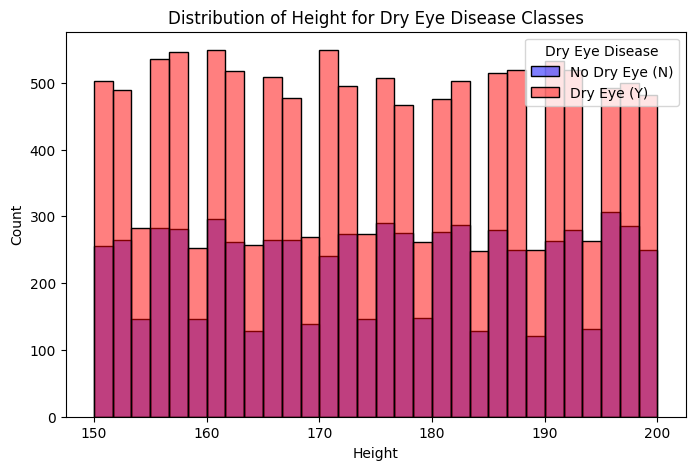

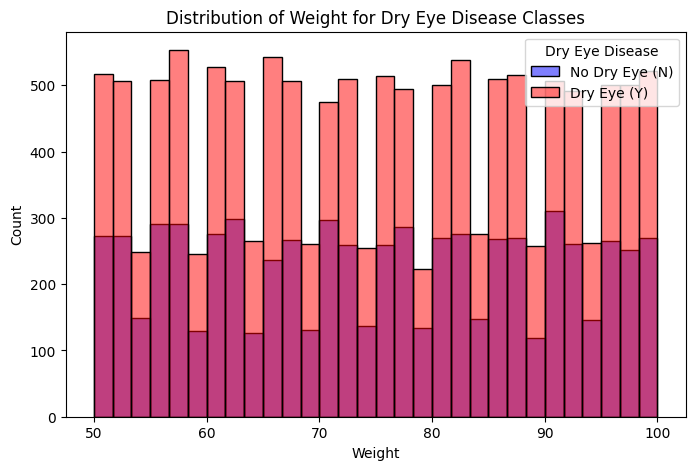

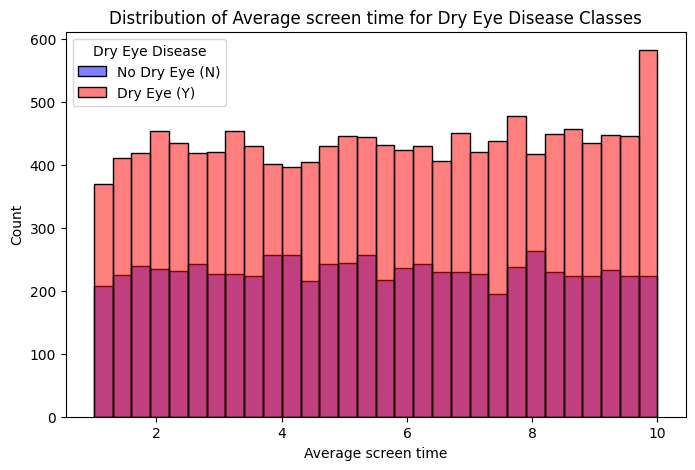

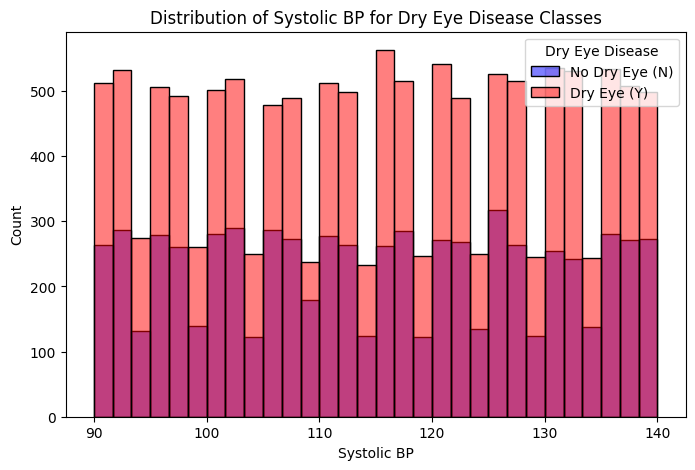

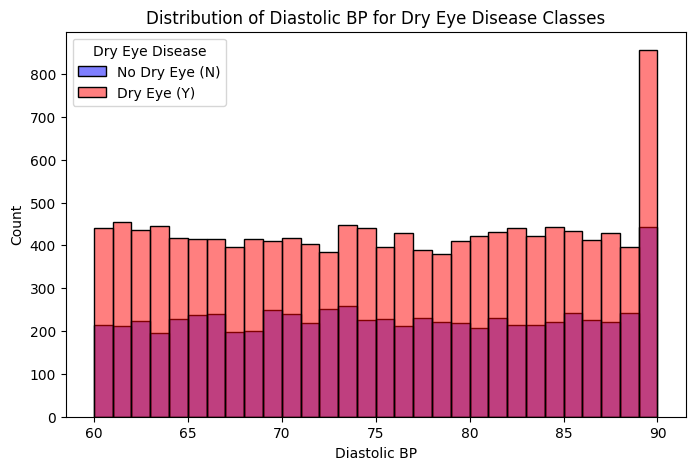

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))

    sns.histplot(df, x=feature, hue=target_class, bins=30,
                 palette={'N': 'blue', 'Y': 'red'}, alpha=0.5, multiple="layer")


    plt.title(f'Distribution of {feature} for Dry Eye Disease Classes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target_class, labels=['No Dry Eye (N)', 'Dry Eye (Y)'])

plt.show()

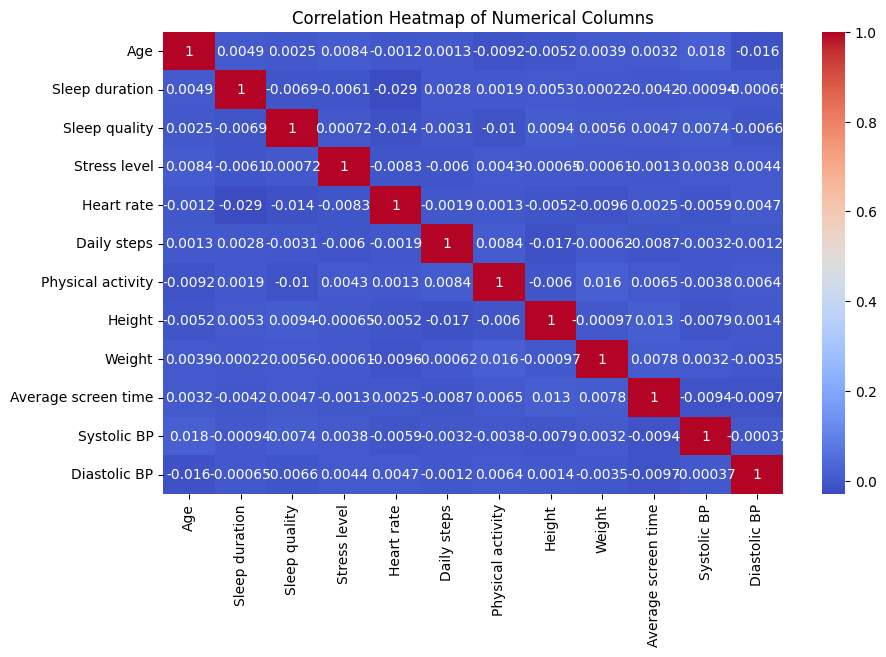

In [ ]:
# Heatmap of numerical column correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
cleaned_df = pd.read_csv("Dry_Eye_Dataset.csv")

cleaned_df.head(3)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N


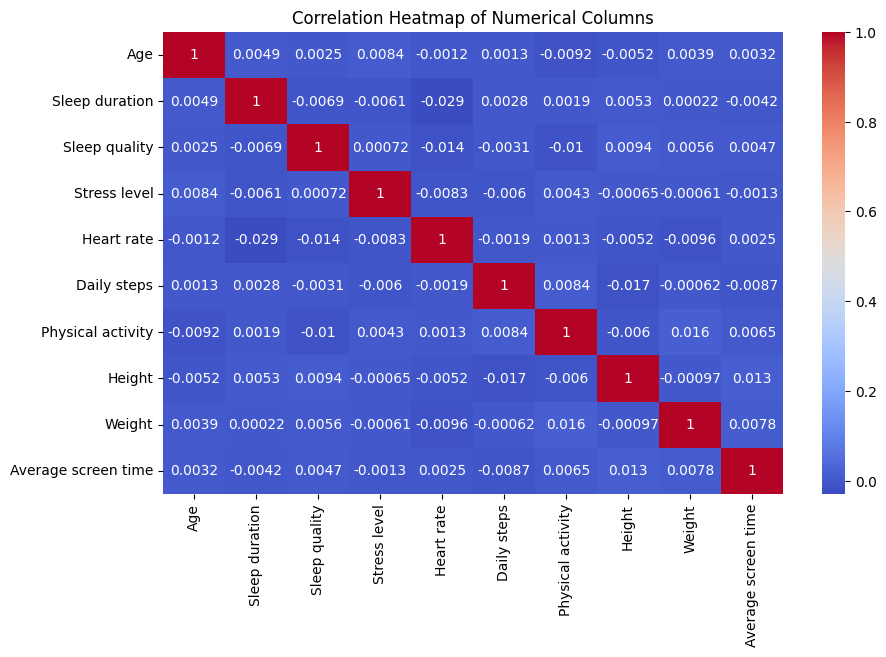

In [ ]:
cleaned_numerical_features = cleaned_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cleaned_categorical_features = cleaned_df.select_dtypes(include=["object"]).columns.tolist()
cleaned_categorical_features.remove("Dry Eye Disease")
cleaned_categorical_features.remove("Blood pressure")

plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df[cleaned_numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

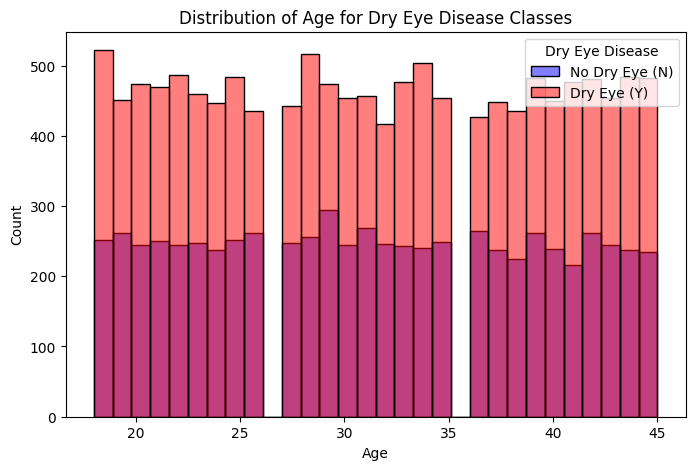

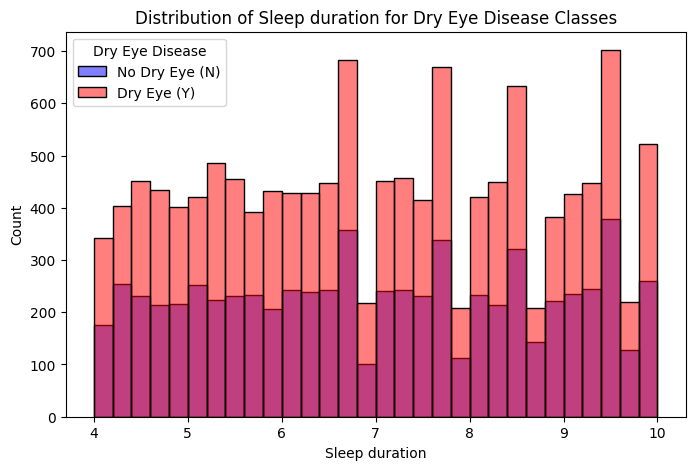

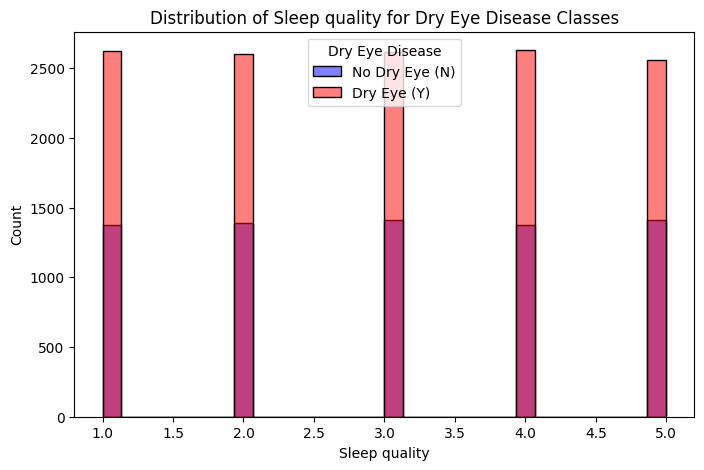

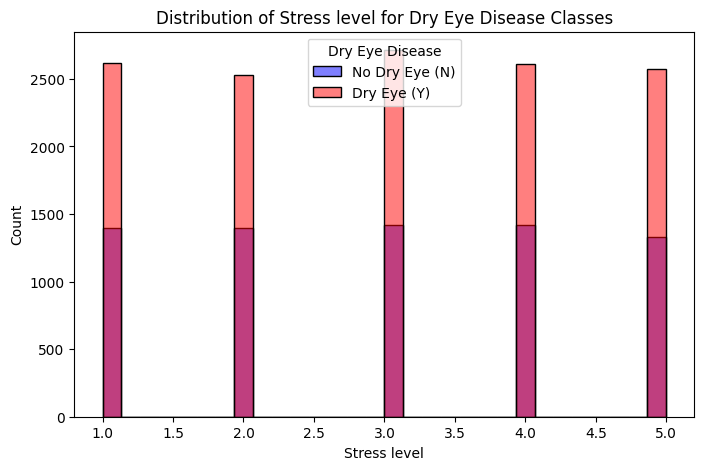

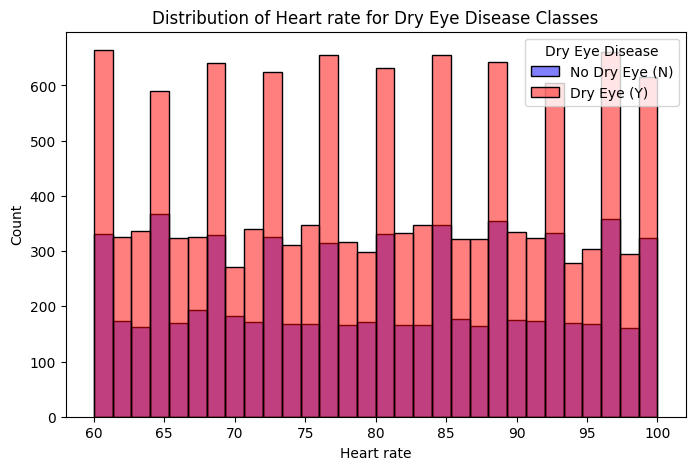

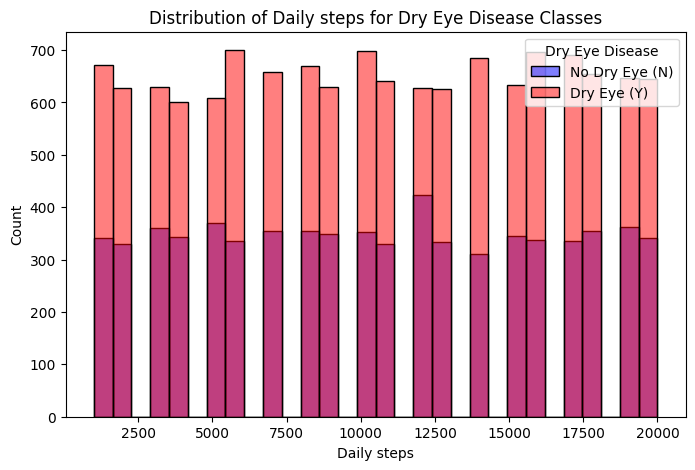

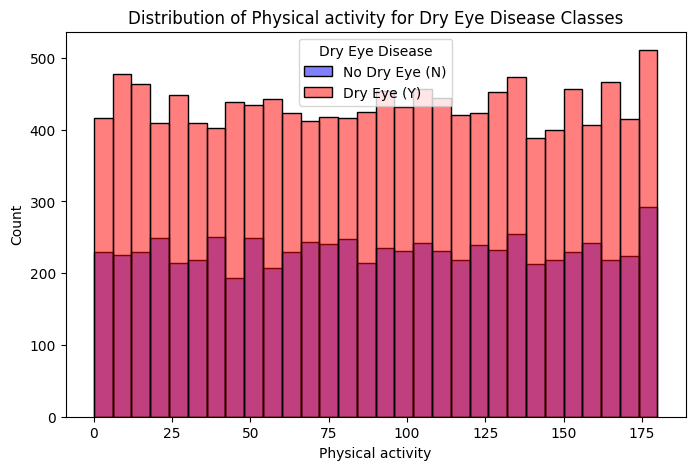

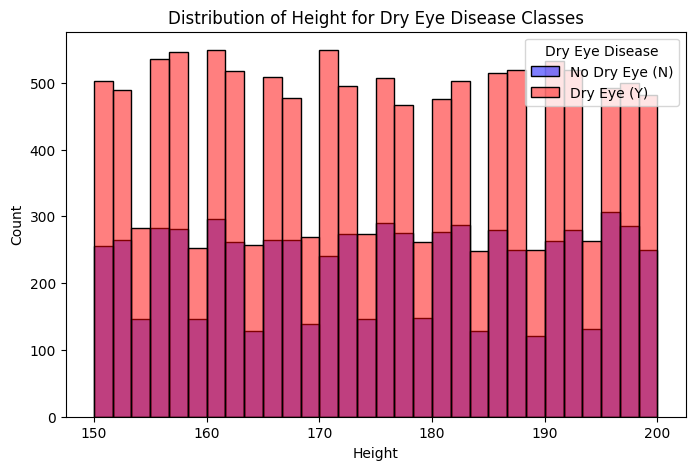

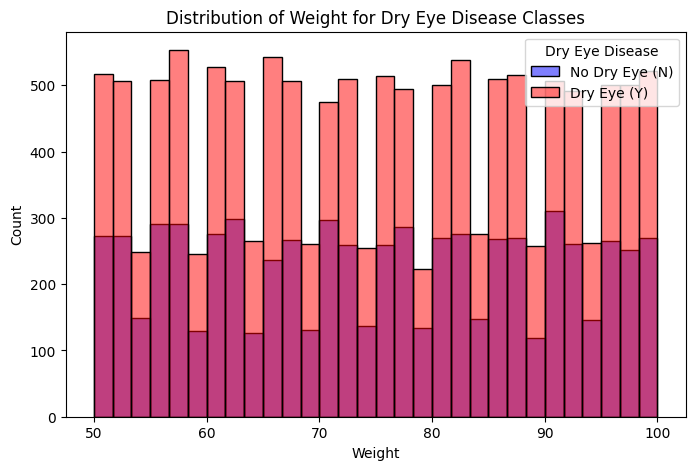

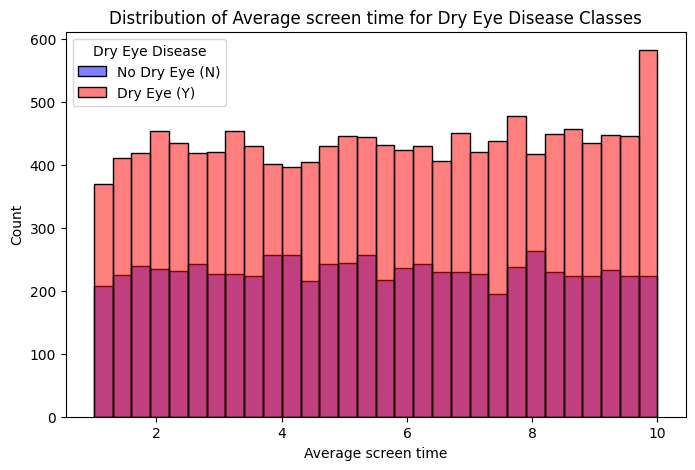

In [ ]:
for feature in cleaned_numerical_features:
    plt.figure(figsize=(8, 5))

    sns.histplot(df, x=feature, hue=target_class, bins=30,
                 palette={'N': 'blue', 'Y': 'red'}, alpha=0.5, multiple="layer")


    plt.title(f'Distribution of {feature} for Dry Eye Disease Classes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target_class, labels=['No Dry Eye (N)', 'Dry Eye (Y)'])

plt.show()

In [ ]:
cleaned_categorical_features

['Gender',
 'Sleep disorder',
 'Wake up during night',
 'Feel sleepy during day',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking',
 'Medical issue',
 'Ongoing medication',
 'Smart device before bed',
 'Blue-light filter',
 'Discomfort Eye-strain',
 'Redness in eye',
 'Itchiness/Irritation in eye']

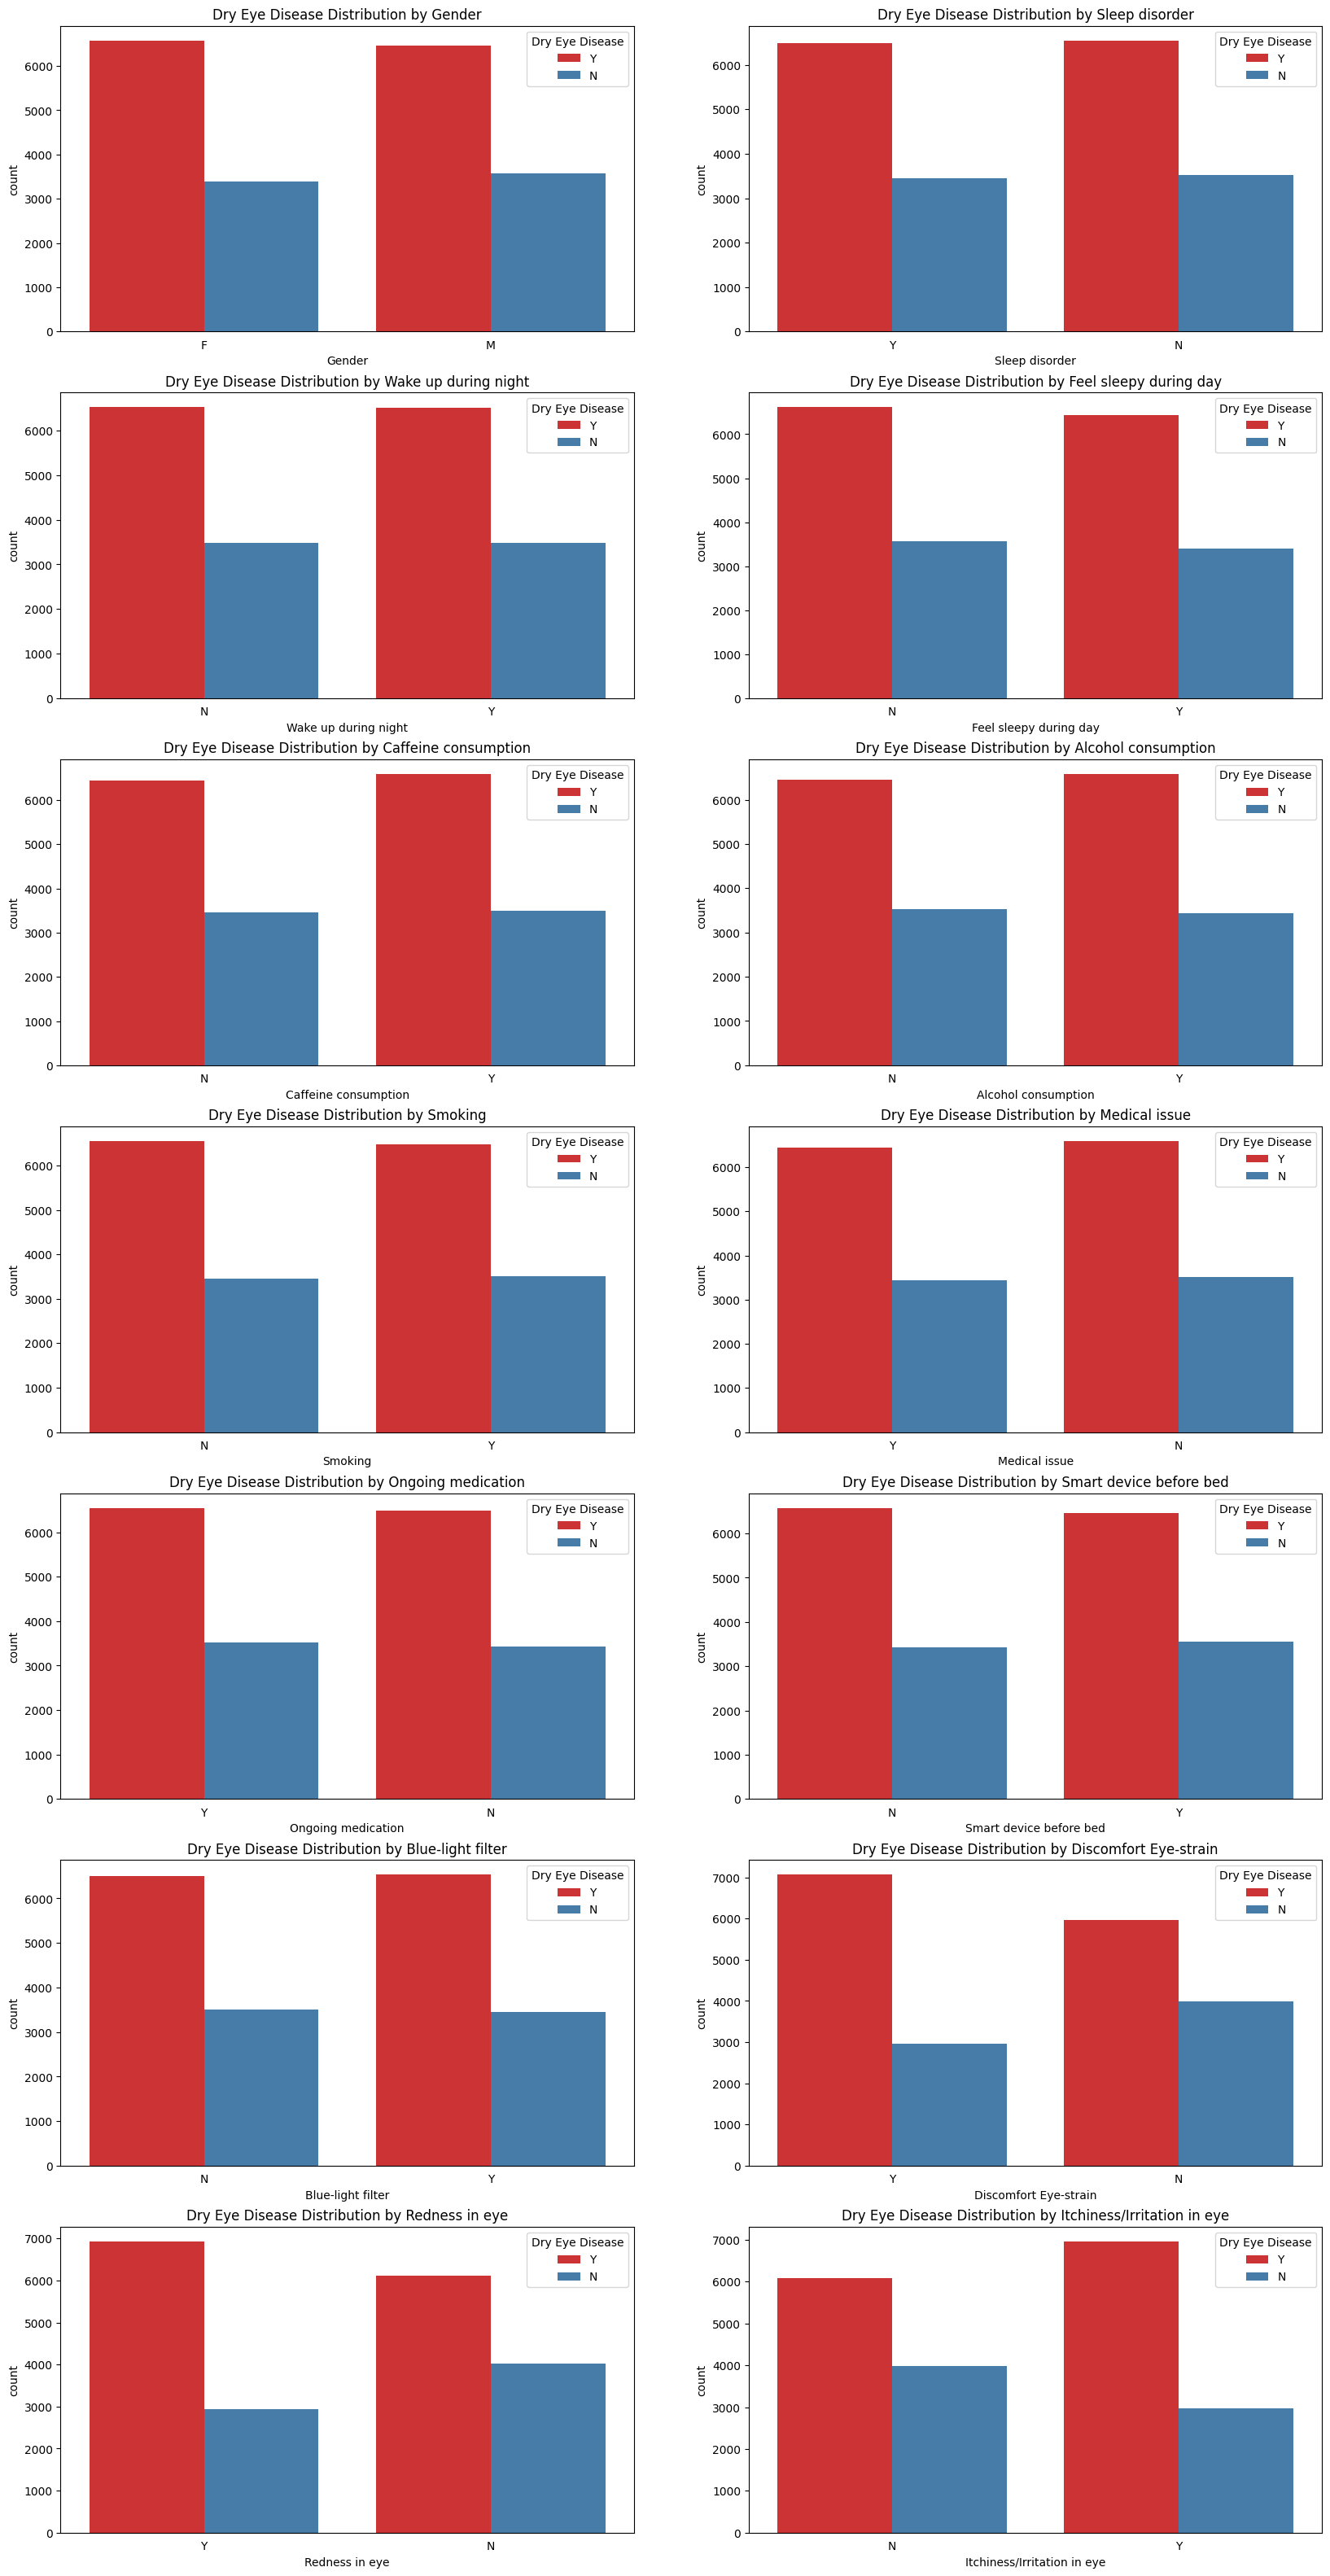

In [ ]:
fig, axes = plt.subplots(nrows=len(cleaned_categorical_features)//2, ncols=2, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(cleaned_categorical_features):
  sns.countplot(data=cleaned_df, x=col, hue="Dry Eye Disease", ax=axes[i], palette="Set1")
  axes[i].set_title(f"Dry Eye Disease Distribution by {col}")
  axes[i].tick_params(axis="x", bottom=False)

plt.show()

In [ ]:
cleaned_df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000
